### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Here's the complete architecture of our model:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

### Compile and train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 25s 11ms/step - loss: 2.2388 - accuracy: 0.3182 - val_loss: 1.4756 - val_accuracy: 0.4799
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5889 - accuracy: 0.4654 - val_loss: 1.3309 - val_accuracy: 0.5483
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3099 - accuracy: 0.5520 - val_loss: 1.0709 - val_accuracy: 0.6247
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1255 - accuracy: 0.6101 - val_loss: 0.9880 - val_accuracy: 0.6601
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9996 - accuracy: 0.6543 - val_loss: 0.8546 - val_accuracy: 0.7023
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8985 - accuracy: 0.6904 - val_loss: 0.8337 - val_accuracy: 0.7087
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8147 - accuracy: 0.7195 - val_loss: 0.7264 -

### Evaluate the model

In [ ]:
model.save('my_cnn_model.h5')

313/313 - 1s - loss: 0.6628 - accuracy: 0.8304 - 1s/epoch - 3ms/step


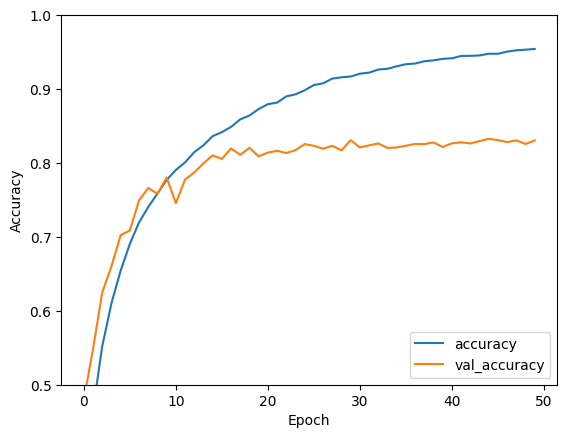

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.8303999900817871
